### Se importan las librerías 

In [2424]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Carga la carpeta en la que estan los cheques:

In [2425]:
carpeta_imagenes = 'D:\Decimosemestre\MachingLearning\Cheques'
archivos = os.listdir(carpeta_imagenes)
carpeta_firmas = 'D:\Decimosemestre\MachingLearning\Firmas'


### Configura la figura de Matplotlib con 15 subgráficos

### Itera sobre cada archivo en la carpeta


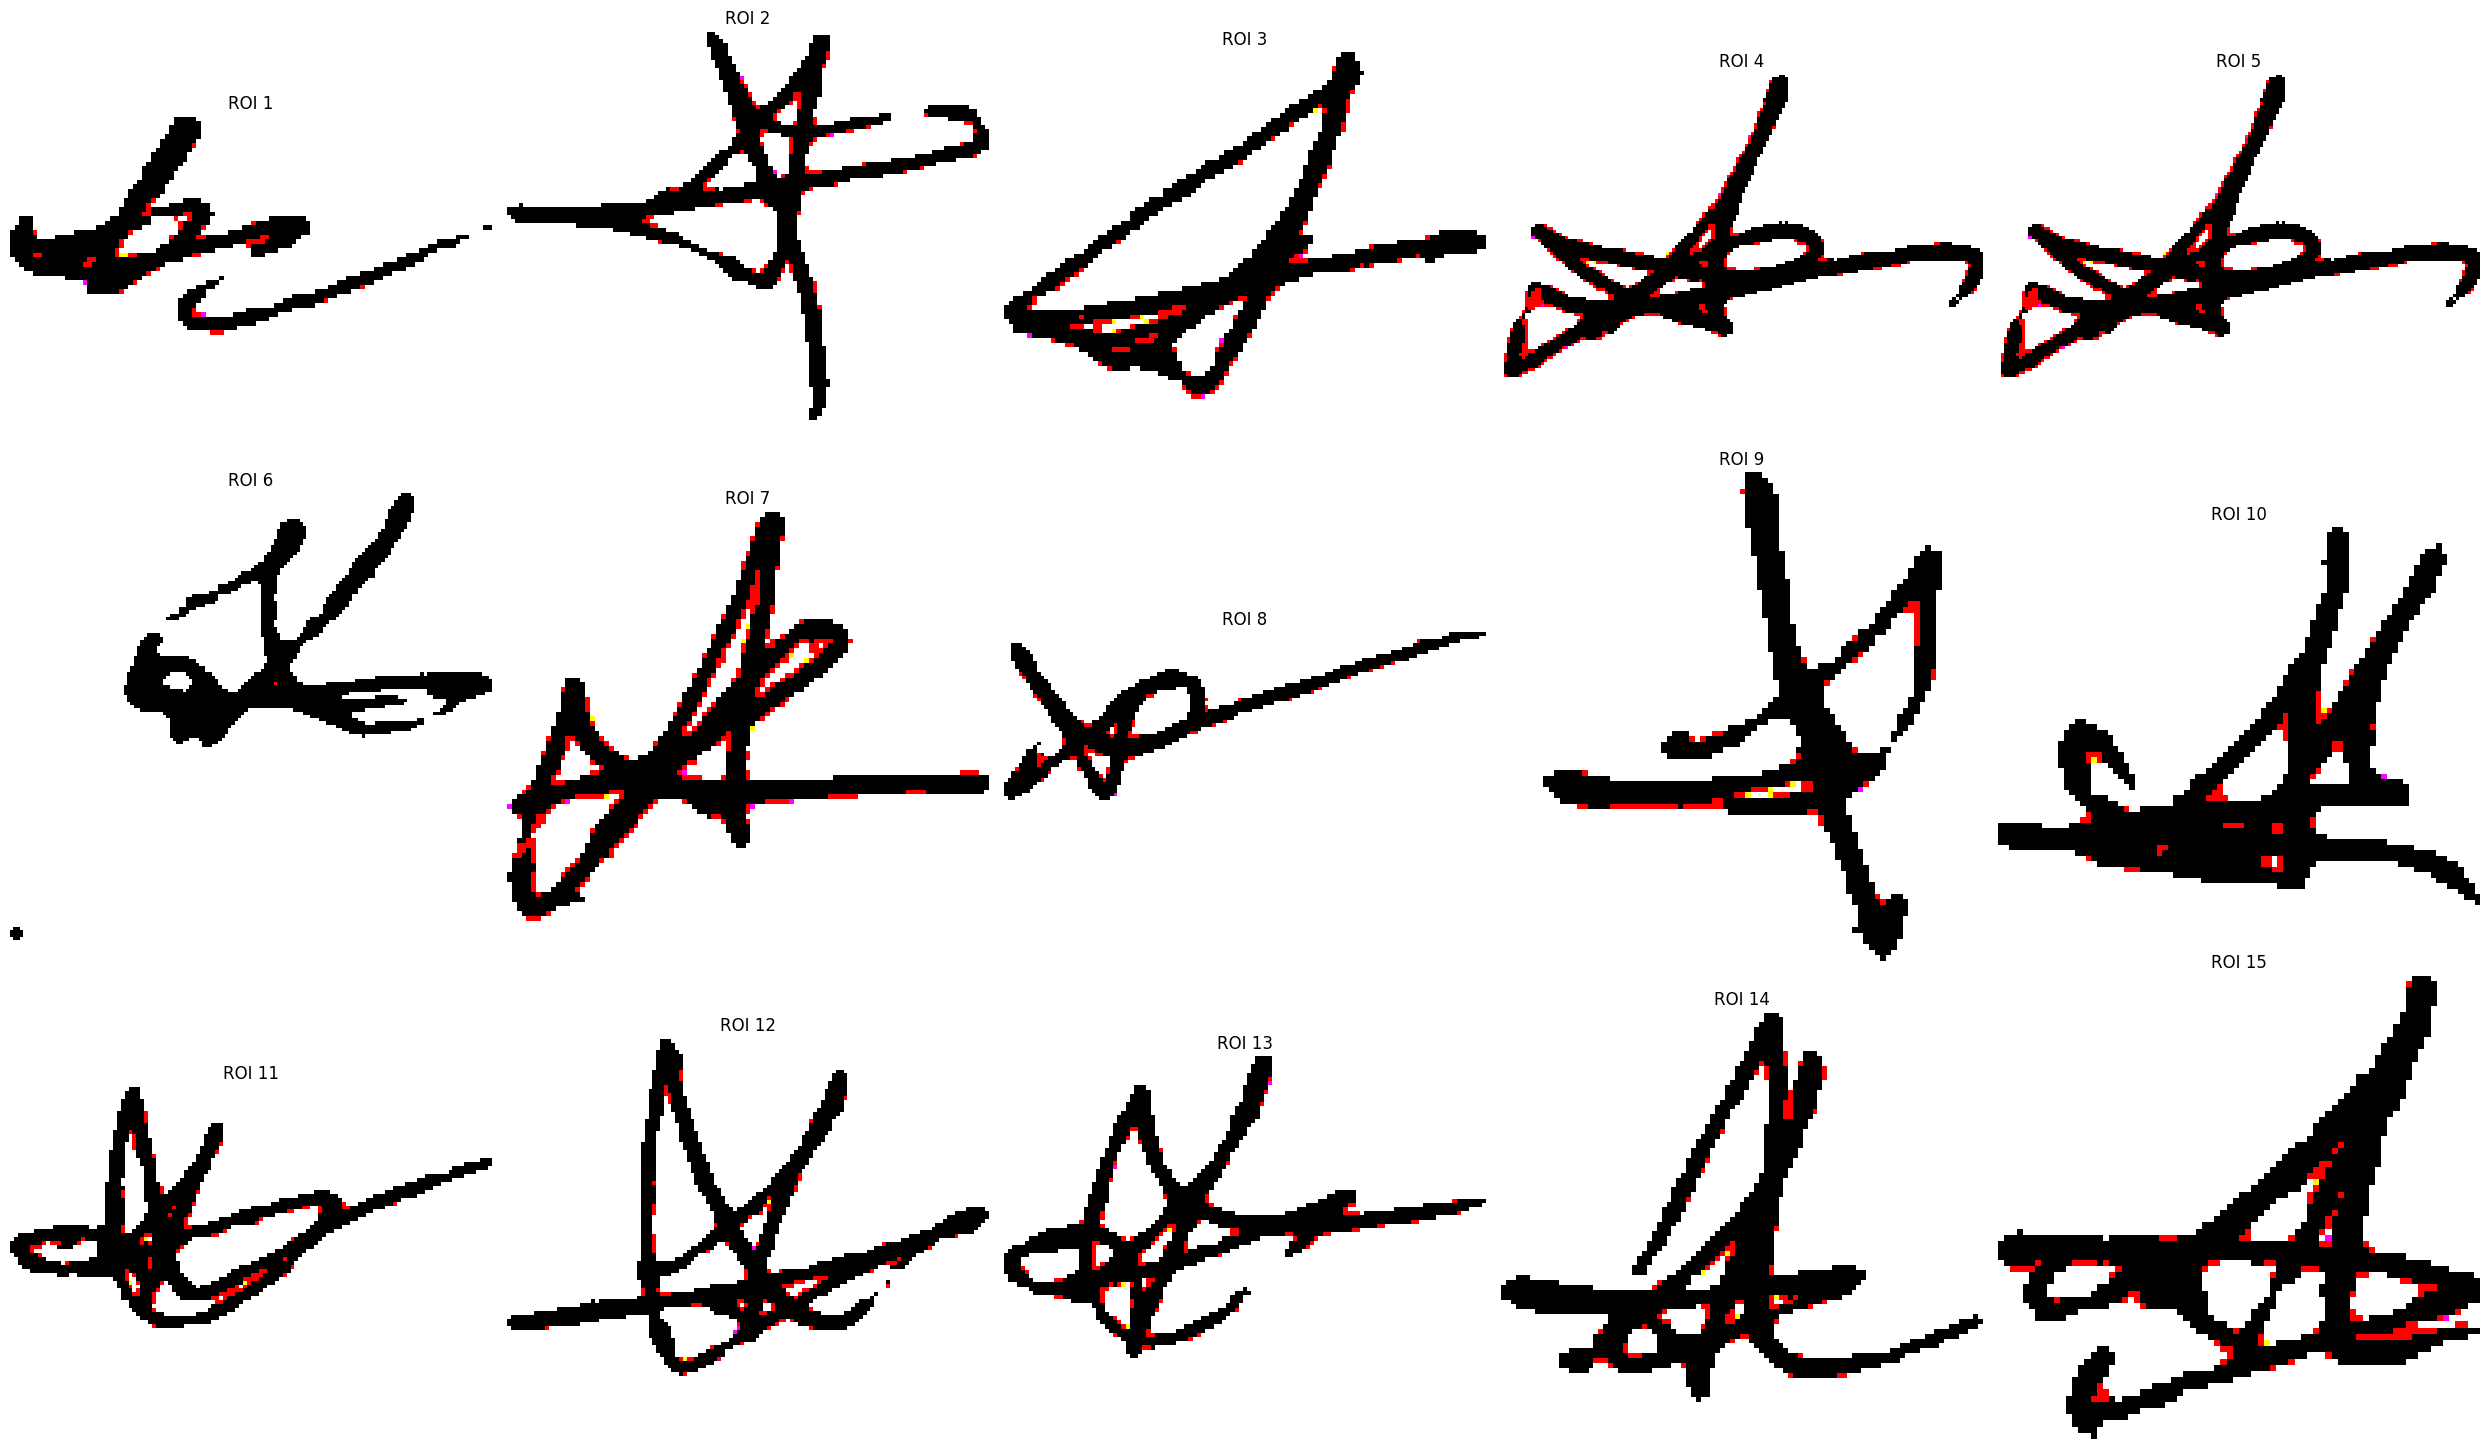

In [2426]:
fig, axs = plt.subplots(3, 5, figsize=(25, 15))
axs = axs.flatten()
arrayImage = []
for i, archivo in enumerate(archivos):
    # Construye la ruta completa de la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Carga la imagen y realiza el procesamiento
    image = cv2.imread(ruta_imagen)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower = np.array([90, 38, 0])
    upper = np.array([145, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)
    result[mask == 0] = (255, 255, 255)

    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = np.concatenate(cnts)
    x, y, w, h = cv2.boundingRect(cnts)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
    ROI = result[y:y + h, x:x + w]
    _, ROI_binaria = cv2.threshold(ROI, 128, 255, cv2.THRESH_BINARY)
    ROI_contra = cv2.bitwise_not(ROI_binaria)

    # Guarda la imagen en la carpeta correspondiente
    nombre_archivo = os.path.splitext(archivo)[0] + '_Firma.jpg'
    arrayImage.append(ROI_contra)
    ruta_firma = os.path.join(carpeta_firmas, nombre_archivo)
    cv2.imwrite(ruta_firma, ROI_binaria)

    # Muestra las imágenes de las firmas en la figura de Matplotlib
    axs[i].imshow(ROI_binaria)
    axs[i].set_title(f'ROI {i + 1}')
    axs[i].axis('off')
    


# Ajusta el diseño y muestra la figura
plt.tight_layout()
plt.show()

### Se guarda el kernel para realizar la erocion de las imagenes

In [2442]:
Entrada =  [np.array([[1,0,0,0,0], 
                     [0,1,0,0,0], 
                     [0,0,1,0,0], 
                     [0,0,0,1,0],
                     [0,0,0,0,1]]),
            np.array([[0,0,0,0,1],
                      [0,0,0,0,1],
                      [0,0,0,0,1],
                      [0,0,0,1,0],
                      [0,0,0,1,0]]),
            np.array([[0,0,0,0,1],
                      [0,0,0,0,1],
                      [0,0,0,1,0],
                      [0,0,1,0,0],
                      [0,0,1,0,0]]),
            np.array([[0,0,0,0,1],
                      [0,0,0,1,0],
                      [0,0,1,0,0],
                      [0,1,0,0,0],
                      [0,1,0,0,0]]),
            np.array([[1,0,0,0,0],
                      [1,0,0,0,0],
                      [1,0,0,0,0],
                      [1,0,0,0,0],
                      [1,0,0,0,0]]),
            np.array([[0,0,0,0,1],
                      [0,0,0,1,0],
                      [0,0,1,0,0],
                      [0,1,0,0,0],
                      [1,0,0,0,0]]),
            np.array([[0,0,0,0,1],
                      [0,0,0,1,0],
                      [0,1,1,0,0],
                      [1,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[0,0,0,0,1],
                      [0,1,1,1,0],
                      [1,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[0,0,0,1,1],
                      [1,1,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[1,1,1,1,1],
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[1,1,1,0,0],
                      [0,0,0,1,1],
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[1,0,0,0,0],
                      [0,1,1,1,0],
                      [0,0,0,0,1],
                      [0,0,0,0,0],
                      [0,0,0,0,0]]),
            np.array([[1,0,0,0,0],
                      [0,1,0,0,0],
                      [0,0,1,1,0],
                      [0,0,0,0,1],
                      [0,0,0,0,0]]),
            np.array([[1,0,0,0,0],
                      [0,1,0,0,0],
                      [0,1,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,1,0]]),
            np.array([[1,0,0,0,0],
                      [0,1,0,0,0],
                      [0,1,0,0,0],
                      [0,1,0,0,0],
                      [0,0,1,0,0]]),
            np.array([[1,0,0,0,0],
                      [1,0,0,0,0],
                      [1,0,0,0,0],
                      [0,1,0,0,0],
                      [0,1,0,0,0]])]

Datos_Entrada = [m.astype(np.uint8) for m in Entrada]

for j in range(2):  
    for i in range(4, 14):  # Tamaños de 4x3 hasta 13x4
        matriz = np.zeros((4, i), dtype=np.uint8)
        if j==0:
            matriz[1, 0] = 1
            matriz[2, 1:i-1] = 1  # Fila de unos en la parte que va creciendo
            matriz[1, i-1] = 1
        else:
            matriz[2, 0] = 1
            matriz[1, 1:i-1] = 1  # Fila de unos en la parte que va creciendo
            matriz[2, i-1] = 1
        Datos_Entrada.append(matriz)

    for i in range(13, 3, -1):  # Tamaños de 13x4 hasta 4x4
        matriz = np.zeros((i, 4), dtype=np.uint8)
        if j==0:
            matriz[0,1] = 1
            matriz[1:i-1, 2] = 1  # Columna de unos en la parte que va creciendo
            matriz[i-1,1] = 1
        else:
            matriz[0,2] = 1
            matriz[1:i-1, 1] = 1  # Columna de unos en la parte que va creciendo
            matriz[i-1,2] = 1
        Datos_Entrada.append(matriz)
print(Datos_Entrada)


[array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8), array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8), array([[0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0],
      

### Se realiza la erocion de las imagenes

In [2428]:
Total_Caract = []

for i in range(10):
        res = []
        firma_Act = arrayImage[i] #Se guardan las imagenes invertidas a como se mostraban anteriormente 
        for estruct in Datos_Entrada:
              firma_erocionada = cv2.erode(firma_Act,estruct)
              res.append(firma_erocionada)
        caract = []
        for resul in res:
               suma = np.sum(resul) // 255
               caract.append(suma)
        Total_Caract.append(caract)
        print(caract)


[747, 1370, 1284, 1307, 1444, 1345, 1607, 1834, 2209, 2371, 1738, 1145, 926, 862, 976, 1219, 1766, 1509, 1294, 1099, 949, 815, 747, 682, 635, 577, 124, 165, 216, 300, 386, 533, 697, 897, 1108, 1383, 1737, 1484, 1260, 1059, 906, 770, 697, 618, 569, 511, 119, 167, 232, 326, 421, 569, 736, 925, 1126, 1393]
[1255, 2151, 1669, 1459, 2574, 1342, 1632, 1966, 2554, 3083, 2463, 1794, 1489, 1503, 1722, 2176, 2459, 1975, 1621, 1410, 1248, 1110, 996, 895, 808, 737, 618, 679, 753, 838, 936, 1061, 1220, 1419, 1708, 2213, 2480, 1987, 1633, 1410, 1233, 1086, 959, 853, 766, 696, 620, 686, 763, 861, 966, 1100, 1269, 1473, 1757, 2243]
[950, 2105, 2047, 2136, 2073, 2219, 2509, 2603, 2911, 3016, 2249, 1538, 1190, 1075, 1253, 1655, 2513, 2078, 1684, 1444, 1290, 1167, 1051, 943, 846, 763, 280, 346, 425, 520, 632, 785, 967, 1197, 1509, 2086, 2493, 2073, 1692, 1465, 1324, 1198, 1078, 972, 876, 786, 273, 342, 422, 526, 656, 820, 1014, 1252, 1563, 2121]
[3679, 5138, 4801, 4642, 5257, 4524, 5036, 5488, 6263, 6902

### Se encuentran los patrones sintéticos positivos 

In [2441]:
import random

for j in range(50):
    numero_aleatorio = random.random()
    val = []
    for i in range(len(Total_Caract[0])):
        numero_aleatorio = random.random()
        desviacion = (np.std([fila[i] for fila in Total_Caract[:10]])*numero_aleatorio)
        suma = np.sum([fila[i] for fila in Total_Caract[:10]])
        pat = ((1/10)*suma)+desviacion
        val.append(int(pat))
    print(val)
    Total_Caract.append(val)

[2264, 3379, 3131, 2996, 3201, 2738, 3231, 4228, 4002, 4786, 4268, 3105, 2382, 2518, 2804, 2829, 4819, 3360, 3215, 2513, 2818, 2612, 2016, 1735, 1791, 1743, 1049, 961, 1351, 1443, 1342, 1804, 2573, 2823, 2761, 3876, 4299, 3004, 2626, 3440, 1986, 2788, 2022, 1774, 1370, 2016, 791, 1194, 1224, 1139, 1416, 2002, 2034, 2848, 2733, 3569]
[2139, 3158, 3094, 3192, 3271, 3147, 3908, 3613, 4486, 4340, 4585, 3721, 3236, 2607, 2432, 2968, 4654, 4192, 3228, 3018, 2484, 1880, 2529, 2294, 1412, 2179, 898, 1021, 1072, 1597, 1741, 1703, 2213, 2545, 2885, 4054, 3866, 3532, 2734, 2995, 3071, 2773, 2178, 2434, 1470, 1855, 951, 1108, 1118, 1369, 1406, 2194, 2060, 2977, 2619, 4137]
[2015, 4188, 3839, 3751, 3994, 3179, 3023, 3946, 5023, 4725, 3335, 2768, 2301, 2405, 2821, 3434, 4295, 3018, 2750, 2261, 2070, 2385, 2573, 1832, 2121, 1754, 890, 952, 1117, 1574, 1481, 2058, 2303, 2083, 3336, 3661, 3762, 3237, 3081, 3282, 2489, 2472, 2140, 1547, 1777, 1978, 1003, 963, 1248, 1219, 1474, 2115, 2124, 2884, 2981, 42

### Se encuentran los patrones sinteticos negativos

In [2430]:
for i in range(50):
    val = []
    for j in range(56):
        val.append(random.uniform(1.0,300.0))
    print(val)
    Total_Caract.append(val)


[221.24891966252775, 276.44369363631, 1.70307740596053, 44.08042020754248, 126.41676902794832, 279.1294101123426, 35.36146088605169, 145.6190501330688, 62.63324017546074, 243.17355916636114, 84.13049362747904, 36.47906078521759, 157.19704490830725, 79.3994882400716, 279.39345828255796, 114.04174878987516, 62.78450357559207, 247.6269613043081, 166.73411197314638, 17.98278263941815, 196.85502600637275, 225.21973740993766, 146.04295639718652, 287.12379831971543, 224.33849545037646, 209.64603579084903, 49.967834219967145, 173.10050023541763, 292.8147925481962, 246.94117099123147, 293.0162575870521, 222.29424068814532, 13.236193688048552, 96.16815576179901, 257.3532225071497, 1.1389017006510267, 111.59561348652656, 237.7728366944395, 21.51487873122541, 247.69500530486866, 161.93113158296916, 292.2384234213082, 17.101532787919616, 70.28150794483159, 258.4252102028017, 158.84952865712572, 231.78166162016444, 291.39484196305835, 146.54180404750926, 83.09791047431808, 268.5892370992364, 51.3644

### Se importan las librerías para la red neuronal

In [2431]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

### Se guarda como dataFame los valores antes calculados

In [2432]:
df = pd.DataFrame(Total_Caract)

### Se crea el vector de clases y Elimina la veriable categorica, deja las variables predictoras en x

In [2433]:
signig = []
for i in range(60):
    signig.append("Aceptado")
for i in range(50):
    signig.append("Rechazado")
df2 = pd.DataFrame(signig)

X = df.iloc[:, :]
print(X.head())

       0       1       2       3       4       5       6       7       8   \
0   747.0  1370.0  1284.0  1307.0  1444.0  1345.0  1607.0  1834.0  2209.0   
1  1255.0  2151.0  1669.0  1459.0  2574.0  1342.0  1632.0  1966.0  2554.0   
2   950.0  2105.0  2047.0  2136.0  2073.0  2219.0  2509.0  2603.0  2911.0   
3  3679.0  5138.0  4801.0  4642.0  5257.0  4524.0  5036.0  5488.0  6263.0   
4  3679.0  5138.0  4801.0  4642.0  5257.0  4524.0  5036.0  5488.0  6263.0   

       9   ...      46      47      48      49      50      51      52  \
0  2371.0  ...   119.0   167.0   232.0   326.0   421.0   569.0   736.0   
1  3083.0  ...   620.0   686.0   763.0   861.0   966.0  1100.0  1269.0   
2  3016.0  ...   273.0   342.0   422.0   526.0   656.0   820.0  1014.0   
3  6902.0  ...  1178.0  1369.0  1613.0  1881.0  2203.0  2585.0  3041.0   
4  6902.0  ...  1178.0  1369.0  1613.0  1881.0  2203.0  2585.0  3041.0   

       53      54      55  
0   925.0  1126.0  1393.0  
1  1473.0  1757.0  2243.0  
2  1252.

### Deja la variable a predecir en y

In [2434]:
y = df2.iloc[:, :]
print(y.head())

          0
0  Aceptado
1  Aceptado
2  Aceptado
3  Aceptado
4  Aceptado


## Se separan los datos con el 80% de los datos para entrenamiento y el 20% para el testing

In [2435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8, random_state=0)

### Mediante el constructor inicializa la instancia_red

In [2436]:
#instancia_red = MLPClassifier(solver='Lbfgs, random_state=0')
instancia_red = MLPClassifier((100,100))
print(instancia_red)

MLPClassifier(hidden_layer_sizes=(100, 100))


## Entrena el modelo llamando al metodo fit

### Nota: observe que no hay una variable que guarde el modelo como en R esto se debe a que al ser python orientado a objetos, el modelo queda en un atributo de la instancia "instancia_red"

In [2437]:
print(y_train.iloc[:,0].values)
print(X_train)
instancia_red.fit(X_train, y_train.iloc[:,0].values)

['Rechazado' 'Aceptado' 'Rechazado' 'Rechazado' 'Rechazado' 'Rechazado'
 'Aceptado' 'Aceptado']
              0            1            2            3            4   \
83    261.709963    55.907911    37.595009    98.470952   160.357740   
9    2056.000000  3112.000000  2850.000000  2693.000000  3279.000000   
103   124.308165   125.441711   269.801794   151.675053   201.677215   
106    14.019821   109.015368    52.175450    38.379999    94.880805   
67     88.224816    63.883978   126.636814   258.055759   290.807636   
64    291.342498    80.185693    97.797265   134.937643   185.522396   
47   2560.000000  3360.000000  3828.000000  3622.000000  4470.000000   
44   2148.000000  3025.000000  3105.000000  3367.000000  3450.000000   

              5            6            7            8            9   ...  \
83     14.823123   149.563103   204.015998   243.611575   247.734987  ...   
9    2559.000000  2641.000000  2773.000000  3160.000000  3547.000000  ...   
103   152.713708    60.9

MLPClassifier(hidden_layer_sizes=(100, 100))

### Imprime las predicciones de testing

In [2438]:
print("Las predicciones en Testing son: {}".format(instancia_red.predict(X_test)))

Las predicciones en Testing son: ['Rechazado' 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Rechazado'
 'Rechazado' 'Aceptado' 'Aceptado' 'Rechazado' 'Rechazado' 'Aceptado'
 'Aceptado' 'Rechazado' 'Rechazado' 'Aceptado' 'Aceptado' 'Rechazado'
 'Rechazado' 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Aceptado' 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Rechazado' 'Rechazado' 'Rechazado' 'Rechazado' 'Rechazado' 'Aceptado'
 'Aceptado' 'Aceptado' 'Rechazado' 'Aceptado' 'Rechazado' 'Rechazado'
 'Aceptado' 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Aceptado' 'Aceptado' 'Aceptado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Aceptado' 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado'
 'Rechazado' 'Aceptado' 'Rechazado' 'Rechazado' 'Aceptado' 'Rechazado'
 'Aceptado' 'Rechazado' 'Aceptado' 'Aceptado' 'Aceptado' 'Rechazado'
 'Rechazado' 'Rechazado' 'Rechazado' 'Rechazado' 'Aceptado' 'Rechaz

### Funcion para calcular los indices de calidad de la prediccion

In [2439]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria = pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres!=None : 
        precision_categoria.columns = nombres
    return {"Matriz de Confusion": MC,
            "Precision Global": precision_global,
            "Error Global": error_global,
            "precision por categoría": precision_categoria}

## Indices de Calidad del modelo

In [2440]:
prediccion = instancia_red.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC, list(np.unique(y)))
for k in indices:
    print("\n%s: \n%s"%(k,str(indices[k])))


Matriz de Confusion: 
[[57  0]
 [ 1 44]]

Precision Global: 
0.9901960784313726

Error Global: 
0.009803921568627416

precision por categoría: 
   Aceptado  Rechazado
0       1.0   0.977778


## Conclusiones
### En conclusion, la segmentación y procesamiento de las imágenes pueden ayudar cuando se requiere tomar una parte de informacion que se encuentra en un grupo mucho mayor donde hay más informacion y como en este caso se segmentan los espacios en blanco para que al momento de recopilar la informacion deseada, en este caso más que nada en la esquina inferior. En este caso el modelo lo que buscaba era realizar la red neuronal con la cual se pueda clasificar por medio de patrones en que caso si se llega a utilizar y en que casos no se tiene una firma igual, en este caso los resultados deseados eras "Autorizado" y "Rechazado"

## Bibliografía
##### URL: Segmentación de imágenes (2020) https://alojamientos.us.es/gtocoma/pid/tema4.pdf
##### Tipos de operaciones morfológicas - MATLAB & Simulink - MathWorks España. (s. f.). https://es.mathworks.com/help/images/morphological-dilation-and-erosion.html
##### URL: SCIKIT-LEARN (Machine Learning in Python 2024)  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifi